In [1]:
import pandas as pd
import time
import numpy as np
import psycopg2 as pg
import sqlalchemy as sq
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
import matplotlib.pyplot as plt
import logging
import sys
import warnings
import seaborn as sns
sns.set_theme()
logging.disable()
if not sys.warnoptions:
    warnings.simplefilter("ignore")

def errorf (real,forecast):
    error=[]
    for i in range(len(real)):
        error.append(real[i]-forecast[i])
    return error

def open_connection():
    '''
    FUNCTION TO CONNECT TO THE POSTGRESQL DATABASE
    '''
    conn = pg.connect(dbname='postgres', user = 'postgres', password = 123, host = 'localhost')
    return conn


Country: Belgium
---
EDBN - NRMSE 2.539553702909607 0.7204637717511818
EDBN - MAE 14.287299570291625 5.55638915962488
EDBN - MedAE 12.44462801372467 5.5333677891379285
 
DBN - NRMSE 4.258262018282658 2.6431835789225038
DBN - MAE 25.918072343827582 18.019166798145662
DBN - MedAE 25.105216603372416 19.662609744933537
 
ANN - NRMSE 2.505460460415887 0.6273341201283035
ANN - MAE 13.815111224723564 4.976496497827841
ANN - MedAE 11.625347228215867 4.960389840566134
 
XGBOOST - NRMSE 2.6021074606680497 0.6505896993455473
XGBOOST - MAE 14.27607348812198 4.971879773355993
XGBOOST - MedAE 12.01028497887618 4.971800094864986
 
Country: Germany
---
EDBN - NRMSE 3.921667809619797 1.1186713068907033
EDBN - MAE 34.829463117857195 12.952730961006202
EDBN - MedAE 30.20179908312799 13.345021282202667
 
DBN - NRMSE 4.941210764767227 1.897737997524624
DBN - MAE 43.328653914445226 19.300549836061922
DBN - MedAE 36.886084005559944 18.931622059532668
 
ANN - NRMSE 4.213559899909098 1.0298133647217267
ANN - M

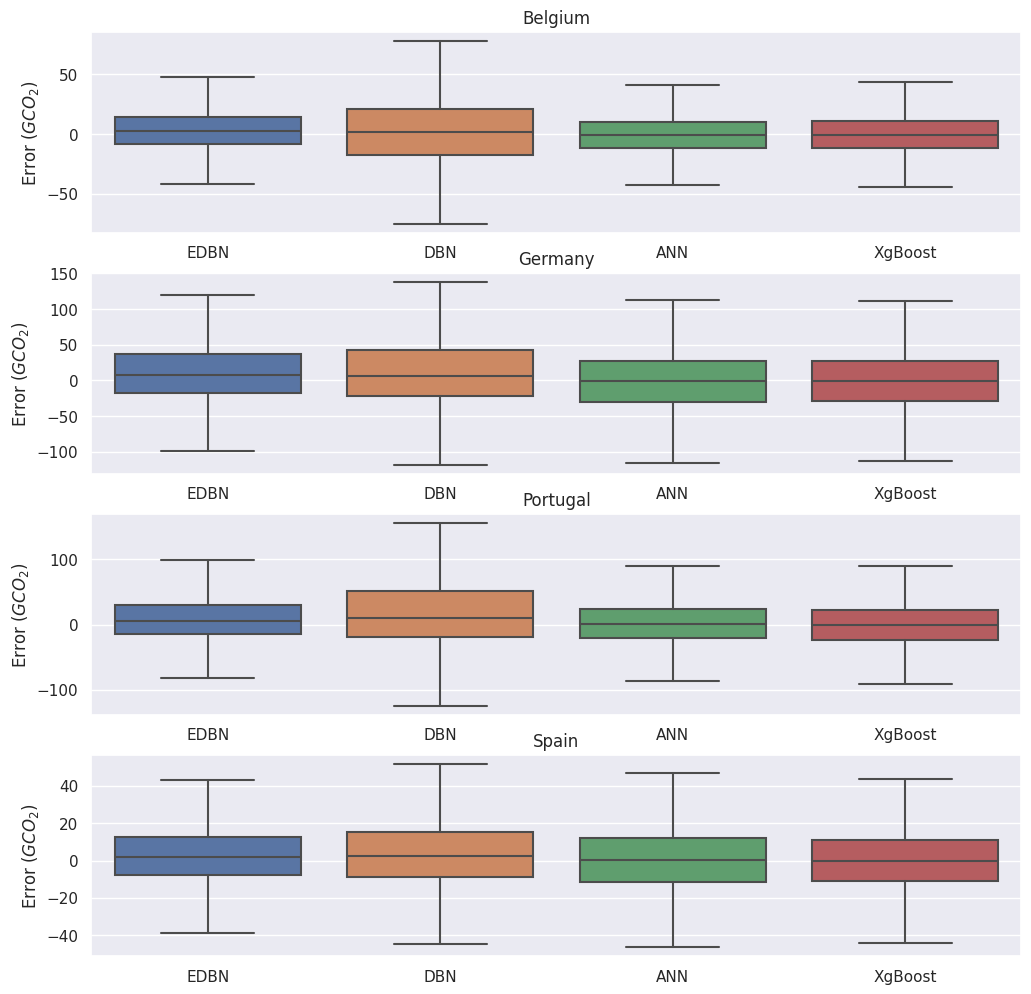

<Figure size 640x480 with 0 Axes>

In [2]:
countries = ['belgium','germany','portugal', 'spain']
name = ['Belgium','Germany','Portugal', 'Spain']
conn = open_connection()
fig, axes = plt.subplots(len(countries), 1, figsize=(12, 12))
horizonte = 3
#lists to save the results of all days including all countries
nrmse_edbn_total = []
nrmse_dbn_total = []
nrmse_ann_total = []
nrmse_xgboost_total = []

for i in range(len(countries)):
    c = countries[i]
    #lists to save the results of all days per country
    #edbn
    nrmse_edbn = []
    mae_edbn = []
    medae_edbn = []
    #dbn
    nrmse_dbn = []
    mae_dbn = []
    medae_dbn = []
    #ann
    nrmse_ann = []
    mae_ann = []
    medae_ann = []
    #xgboost
    nrmse_xgboost = []
    mae_xgboost = []
    medae_xgboost = []
    
    q = f'''select * from results."forecast_final_{c}{horizonte}"'''
    edbn = pd.read_sql(q,conn)
    
    q = f'''select * from results."forecast_final_{c}dbn_onestep{horizonte}"'''
    dbn = pd.read_sql(q,conn)
    
    q = f'''select * from results."forecast_{c}ann{horizonte}"'''
    ann = pd.read_sql(q,conn)
    
    q = f'''select * from results."forecast_{c}xgboost{horizonte}"'''
    xgboost = pd.read_sql(q,conn)
    
    for d in edbn['Date'].unique():
        #edbn
        nrmse_edbn_total.append(np.sqrt((mean_squared_error(edbn['Emission'][edbn['Date']==d],edbn['Emissions Forecast'][edbn['Date']==d]))/(max(edbn['Emission'][edbn['Date']==d])-min(edbn['Emission'][edbn['Date']==d]))))
        nrmse_edbn.append(np.sqrt((mean_squared_error(edbn['Emission'][edbn['Date']==d],edbn['Emissions Forecast'][edbn['Date']==d]))/(max(edbn['Emission'][edbn['Date']==d])-min(edbn['Emission'][edbn['Date']==d]))))
        mae_edbn.append(mean_absolute_error(edbn['Emission'][edbn['Date']==d],edbn['Emissions Forecast'][edbn['Date']==d]))
        medae_edbn.append(median_absolute_error(edbn['Emission'][edbn['Date']==d],edbn['Emissions Forecast'][edbn['Date']==d]))
        
        #dbn
        nrmse_dbn_total.append(np.sqrt((mean_squared_error(dbn['Emission'][dbn['Date']==d],dbn['Emissions Forecast'][dbn['Date']==d]))/(max(dbn['Emission'][dbn['Date']==d])-min(dbn['Emission'][dbn['Date']==d]))))
        nrmse_dbn.append(np.sqrt((mean_squared_error(dbn['Emission'][dbn['Date']==d],dbn['Emissions Forecast'][dbn['Date']==d]))/(max(dbn['Emission'][dbn['Date']==d])-min(dbn['Emission'][dbn['Date']==d]))))
        mae_dbn.append(mean_absolute_error(dbn['Emission'][dbn['Date']==d],dbn['Emissions Forecast'][dbn['Date']==d]))
        medae_dbn.append(median_absolute_error(dbn['Emission'][dbn['Date']==d],dbn['Emissions Forecast'][dbn['Date']==d]))
        
        #ANN
        nrmse_ann_total.append(np.sqrt((mean_squared_error(ann['Emission'][ann['Date']==d],ann['Emissions Forecast'][ann['Date']==d]))/(max(ann['Emission'][ann['Date']==d])-min(ann['Emission'][ann['Date']==d]))))
        nrmse_ann.append(np.sqrt((mean_squared_error(ann['Emission'][ann['Date']==d],ann['Emissions Forecast'][ann['Date']==d]))/(max(ann['Emission'][ann['Date']==d])-min(ann['Emission'][ann['Date']==d]))))
        mae_ann.append(mean_absolute_error(ann['Emission'][ann['Date']==d],ann['Emissions Forecast'][ann['Date']==d]))
        medae_ann.append(median_absolute_error(ann['Emission'][ann['Date']==d],ann['Emissions Forecast'][ann['Date']==d]))

        #xgboost
        nrmse_xgboost_total.append(np.sqrt((mean_squared_error(xgboost['Emission'][xgboost['Date']==d],xgboost['Emissions Forecast'][xgboost['Date']==d]))/(max(xgboost['Emission'][xgboost['Date']==d])-min(xgboost['Emission'][xgboost['Date']==d]))))
        nrmse_xgboost.append(np.sqrt((mean_squared_error(xgboost['Emission'][xgboost['Date']==d],xgboost['Emissions Forecast'][xgboost['Date']==d]))/(max(xgboost['Emission'][xgboost['Date']==d])-min(xgboost['Emission'][xgboost['Date']==d]))))
        mae_xgboost.append(mean_absolute_error(xgboost['Emission'][xgboost['Date']==d],xgboost['Emissions Forecast'][xgboost['Date']==d]))
        medae_xgboost.append(median_absolute_error(xgboost['Emission'][xgboost['Date']==d],xgboost['Emissions Forecast'][xgboost['Date']==d]))

    print('Country:', name[i])
    print('---')
    print('EDBN - NRMSE',np.mean(nrmse_edbn),np.std(nrmse_edbn))
    print('EDBN - MAE',np.mean(mae_edbn),np.std(mae_edbn))
    print('EDBN - MedAE',np.mean(medae_edbn),np.std(medae_edbn))
    print(' ')
    print('DBN - NRMSE',np.mean(nrmse_dbn),np.std(nrmse_dbn))
    print('DBN - MAE',np.mean(mae_dbn),np.std(mae_dbn))
    print('DBN - MedAE',np.mean(medae_dbn),np.std(medae_dbn))
    print(' ')
    print('ANN - NRMSE',np.mean(nrmse_ann),np.std(nrmse_ann))
    print('ANN - MAE',np.mean(mae_ann),np.std(mae_ann))
    print('ANN - MedAE',np.mean(medae_ann),np.std(medae_ann))
    print(' ')
    print('XGBOOST - NRMSE',np.mean(nrmse_xgboost),np.std(nrmse_xgboost))
    print('XGBOOST - MAE',np.mean(mae_xgboost),np.std(mae_xgboost))
    print('XGBOOST - MedAE',np.mean(medae_xgboost),np.std(medae_xgboost))
    print(' ')
    
    aux_erro_edbn = errorf(edbn['Emission'],edbn['Emissions Forecast'])
    aux_erro_dbn = errorf(dbn['Emission'],dbn['Emissions Forecast'])
    aux_erro_ann = errorf(ann['Emission'],ann['Emissions Forecast'])
    aux_erro_xgboost = errorf(xgboost['Emission'],xgboost['Emissions Forecast'])
    erro_edbn = pd.DataFrame()
    erro_edbn['Error'] = aux_erro_edbn
    erro_edbn['Model'] = 'EDBN'
    erro_dbn = pd.DataFrame()
    erro_dbn['Error'] = aux_erro_dbn
    erro_dbn['Model'] = 'DBN'
    erro_ann = pd.DataFrame()
    erro_ann['Error'] = aux_erro_ann
    erro_ann['Model'] = 'ANN'
    erro_xgboost = pd.DataFrame()
    erro_xgboost['Error'] = aux_erro_xgboost
    erro_xgboost['Model'] = 'XgBoost'
    erro_general = pd.concat([erro_edbn,erro_dbn,erro_ann,erro_xgboost])
    sns.boxplot(ax=axes[i],data=erro_general, x='Model', y='Error',showfliers=False)
    axes[i].set_ylabel("Error $(GCO_2)$")
    axes[i].set(xlabel=None)
    axes[i].set_title(name[i])
conn.close()
plt.show()
plt.savefig('figures/boxplot_errors.pdf', bbox_inches='tight')

In [3]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
f_oneway(nrmse_edbn_total, nrmse_dbn_total, nrmse_ann_total, nrmse_xgboost_total)

F_onewayResult(statistic=527.1976016565774, pvalue=0.0)

In [4]:
aux = pd.DataFrame()
aux['NRMSE'] = nrmse_edbn_total
aux['Method'] = '1-EDBN'
aux1 = pd.DataFrame()
aux1['NRMSE'] = nrmse_dbn_total
aux1['Method'] = '2-DBN'
aux2 = pd.DataFrame()
aux2['NRMSE'] = nrmse_ann_total
aux2['Method'] = '3-ANN'
aux3 = pd.DataFrame()
aux3['NRMSE'] = nrmse_xgboost_total
aux3['Method'] = '4-XgBoost'
df = pd.concat([aux,aux1,aux2,aux3])
tukey = pairwise_tukeyhsd(endog=df['NRMSE'],
                          groups=df['Method'],
                          alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
1-EDBN     2-DBN   1.3657    0.0  1.2674   1.464   True
1-EDBN     3-ANN   0.1442  0.001  0.0458  0.2425   True
1-EDBN 4-XgBoost   0.2949    0.0  0.1965  0.3932   True
 2-DBN     3-ANN  -1.2215    0.0 -1.3199 -1.1232   True
 2-DBN 4-XgBoost  -1.0708    0.0 -1.1692 -0.9725   True
 3-ANN 4-XgBoost   0.1507 0.0005  0.0524  0.2491   True
-------------------------------------------------------


In [5]:
#Perfomance illustration using one day of Germany
conn = open_connection()
horizonte = 3
c = 'germany'
q = f'''select * from results."forecast_final_{c}{horizonte}"'''
edbn = pd.read_sql(q,conn)

q = f'''select * from results."forecast_final_{c}dbn_onestep{horizonte}"'''
dbn = pd.read_sql(q,conn)

q = f'''select * from results."forecast_{c}ann{horizonte}"'''
ann = pd.read_sql(q,conn)

q = f'''select * from results."forecast_{c}xgboost{horizonte}"'''
xgboost = pd.read_sql(q,conn)
conn.close()

#select the day that presented the higher difference between min and max real values
maximo = 0
for i in edbn['Date'].unique():
    teste = max(edbn['Emission'][edbn['Date']==i])-min(edbn['Emission'][edbn['Date']==i])
    if teste > maximo:
        maximo = teste
        day = i

In [6]:
day

datetime.date(2021, 3, 10)

In [7]:
edbn_plot = edbn[edbn['Date']==day].reset_index(drop = True)
dbn_plot = dbn[dbn['Date']==day].reset_index(drop = True)
ann_plot = ann[dbn['Date']==day].reset_index(drop = True)
xgboost_plot = xgboost[xgboost['Date']==day].reset_index(drop = True)
print("EDBN")
print("NRMSE:",np.sqrt((mean_squared_error(edbn_plot['Emission'],edbn_plot['Emissions Forecast']))/(max(edbn_plot['Emission'])-min(edbn_plot['Emission']))))
print("MAE",mean_absolute_error(edbn_plot['Emission'],edbn_plot['Emissions Forecast']))
print("MedAE",median_absolute_error(edbn_plot['Emission'],edbn_plot['Emissions Forecast']))
print(" ")

print("DBN")
print("NRMSE:",np.sqrt((mean_squared_error(dbn_plot['Emission'],dbn_plot['Emissions Forecast']))/(max(dbn_plot['Emission'])-min(dbn_plot['Emission']))))
print("MAE",mean_absolute_error(dbn_plot['Emission'],dbn_plot['Emissions Forecast']))
print("MedAE",median_absolute_error(dbn_plot['Emission'],dbn_plot['Emissions Forecast']))
print(" ")

print("ANN")
print("NRMSE:",np.sqrt((mean_squared_error(ann_plot['Emission'],ann_plot['Emissions Forecast']))/(max(ann_plot['Emission'])-min(ann_plot['Emission']))))
print("MAE",mean_absolute_error(ann_plot['Emission'],ann_plot['Emissions Forecast']))
print("MedAE",median_absolute_error(ann_plot['Emission'],ann_plot['Emissions Forecast']))
print(" ")

print("XGBOOST")
print("NRMSE:",np.sqrt((mean_squared_error(xgboost_plot['Emission'],xgboost_plot['Emissions Forecast']))/(max(xgboost_plot['Emission'])-min(xgboost_plot['Emission']))))
print("MAE",mean_absolute_error(xgboost_plot['Emission'],xgboost_plot['Emissions Forecast']))
print("MedAE",median_absolute_error(xgboost_plot['Emission'],xgboost_plot['Emissions Forecast']))

EDBN
NRMSE: 2.362741483578191
MAE 33.98414989793593
MedAE 29.399722886681644
 
DBN
NRMSE: 3.7680328433150834
MAE 50.32178863263551
MedAE 36.25408320989797
 
ANN
NRMSE: 4.884667318085822
MAE 65.71358589886906
MedAE 53.73784555679063
 
XGBOOST
NRMSE: 4.031925219973761
MAE 60.071107932959364
MedAE 59.4537592073753


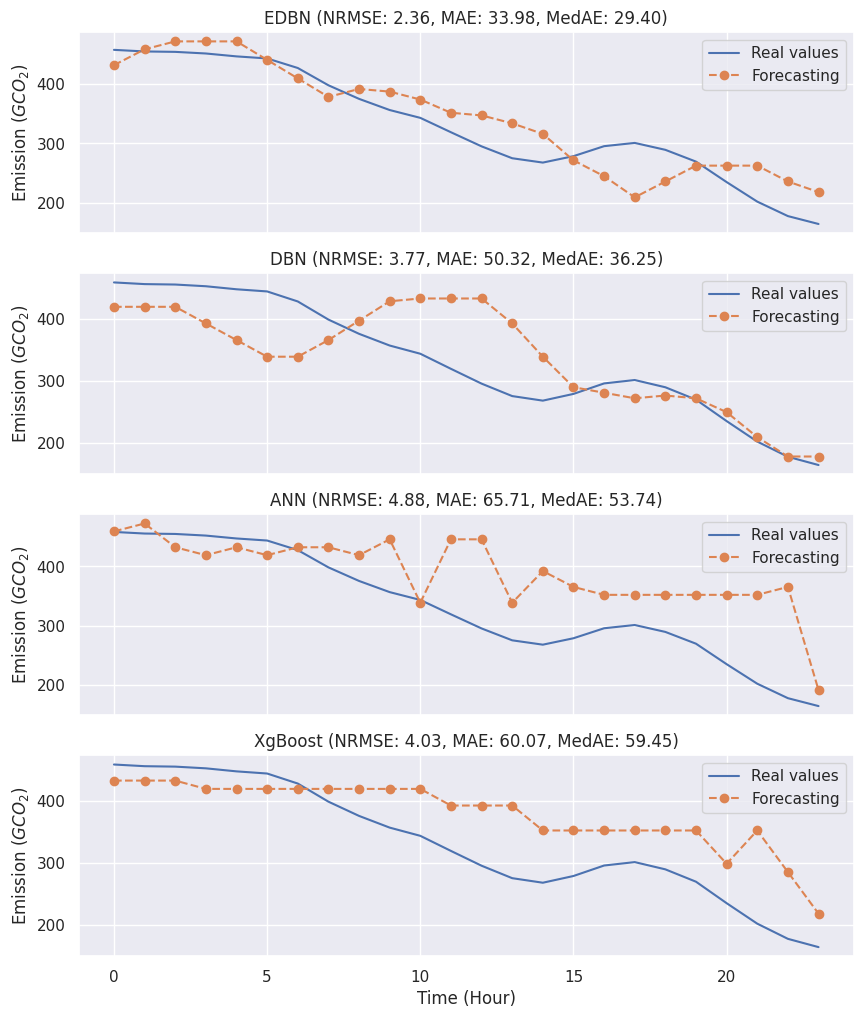

In [8]:
fig, axes = plt.subplots(4, 1, figsize=(10, 12))
axes[0].plot(edbn_plot['Hour'],edbn_plot['Emission'],label = 'Real values')
axes[0].plot(edbn_plot['Hour'],edbn_plot['Emissions Forecast'],label = 'Forecasting', linestyle='dashed', marker='o')
axes[0].set_ylabel("Emission $(GCO_2)$")
axes[0].set(xlabel=None)
axes[0].xaxis.set_ticklabels([]) 
axes[0].legend()
axes[0].set_title('EDBN (NRMSE: 2.36, MAE: 33.98, MedAE: 29.40)')

axes[1].plot(dbn_plot['Hour'],dbn_plot['Emission'],label = 'Real values')
axes[1].plot(dbn_plot['Hour'],dbn_plot['Emissions Forecast'],label = 'Forecasting',linestyle='dashed', marker='o')
axes[1].set_ylabel("Emission $(GCO_2)$")
axes[1].set(xlabel=None)
axes[1].xaxis.set_ticklabels([]) 
axes[1].legend()
axes[1].set_title('DBN (NRMSE: 3.77, MAE: 50.32, MedAE: 36.25)')

axes[2].plot(ann_plot['Hour'],ann_plot['Emission'],label = 'Real values')
axes[2].plot(ann_plot['Hour'],ann_plot['Emissions Forecast'],label = 'Forecasting',linestyle='dashed', marker='o')
axes[2].set_ylabel("Emission $(GCO_2)$")
axes[2].set(xlabel=None)
axes[2].xaxis.set_ticklabels([]) 
axes[2].legend()
axes[2].set_title('ANN (NRMSE: 4.88, MAE: 65.71, MedAE: 53.74)')

axes[3].plot(xgboost_plot['Hour'],xgboost_plot['Emission'],label = 'Real values')
axes[3].plot(xgboost_plot['Hour'],xgboost_plot['Emissions Forecast'],label = 'Forecasting',linestyle='dashed', marker='o')
axes[3].set_ylabel("Emission $(GCO_2)$")
axes[3].set_xlabel("Time (Hour)")
axes[3].legend()
axes[3].set_title('XgBoost (NRMSE: 4.03, MAE: 60.07, MedAE: 59.45)')
plt.savefig('figures/plot_emission.pdf', bbox_inches='tight')

In [9]:
#time of each model
countries = ['belgium','germany','portugal', 'spain']
name = ['Belgium','Germany','Portugal', 'Spain']
conn = open_connection()
horizonte = 3
#lists to save the results of all days including all countries
#edbn
model_edbn = []
inference_edbn = []
#dbn
inference_dbn = []
#ann
inference_ann = []
#xgboost
inference_xgboost = []

for i in range(len(countries)):
    c = countries[i]
    
    q = f'''select * from results."time_model_final_{c}{horizonte}"'''
    edbn = pd.read_sql(q,conn)
    model_edbn.extend(edbn['tempo'])
    q = f'''select * from results."time_inference_final_{c}{horizonte}"'''
    edbn = pd.read_sql(q,conn)
    inference_edbn.extend(edbn['tempo'])
    
    q = f'''select * from results."time_inference_final_{c}dbn_onestep{horizonte}"'''
    dbn = pd.read_sql(q,conn)
    inference_dbn.extend(dbn['tempo'])
    
    q = f'''select * from results."time_inference_{c}ann{horizonte}"'''
    ann = pd.read_sql(q,conn)
    inference_ann.extend(ann['tempo'])
    
    q = f'''select * from results."time_inference_{c}xgboost{horizonte}"'''
    xgboost = pd.read_sql(q,conn)
    inference_xgboost.extend(xgboost['tempo'])
conn.close()

In [10]:
print('EDBN time spent to structural learning(seconds): ',np.mean(model_edbn),np.std(model_edbn))
print('EDBN time spent to parameter learning and forecasting(seconds): ',np.mean(inference_edbn),np.std(inference_edbn))
print(' ')
print('DBN time spent to parameter learning and forecasting(seconds): ',np.mean(inference_dbn),np.std(inference_dbn))
print(' ')
print('ANN time spent to parameter learning and forecasting(seconds): ',np.mean(inference_ann),np.std(inference_ann))
print(' ')
print('XGBOOST time spent to parameter learning and forecasting(seconds): ',np.mean(inference_xgboost),np.std(inference_xgboost))

EDBN time spent to structural learning(seconds):  1.594224564892122 0.9357102303566057
EDBN time spent to parameter learning and forecasting(seconds):  1.4443172026846267 0.3267402455268639
 
DBN time spent to parameter learning and forecasting(seconds):  1.8946016345507053 0.6267138862139826
 
ANN time spent to parameter learning and forecasting(seconds):  10.221809332084877 6.916035408409605
 
XGBOOST time spent to parameter learning and forecasting(seconds):  31.35544936715238 26.665216381803607
